# Python for ML 

Source: [IBM Specialization | Machine Learning with Python](https://www.coursera.org/learn/machine-learning-with-python/home/welcome)


## Simple Linear Regression with Python

### Step 1 | Importing the required packages

### Step 2 | Loading data
*keep in mind you are likely to be using large datasets, i.e you might need access to large cloud storage. This notebook uses the fuel consumption ratings and CO2 emissions dataset provided in [IBM Specialization | Machine Learning with Python](https://www.coursera.org/learn/machine-learning-with-python/home/welcome)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-09-08 00:26:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

100%[======================================>] 72,629      --.-K/s   in 0.004s  

2019-09-08 00:26:18 (16.0 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



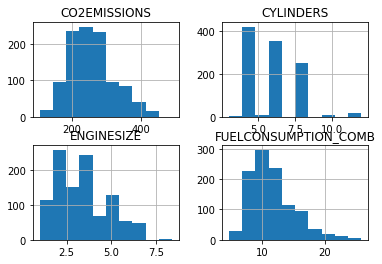

In [3]:
#Defining our dataframe
df = pd.read_csv("FuelConsumption.csv")

#Specifying a subset of the dataframe we are interested in:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

#Visualizing the cdf as historgrams (in the specific order we prefer)
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

### Step 3 | Looking at scatterplots to determine linearity

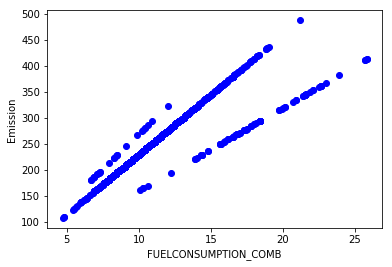

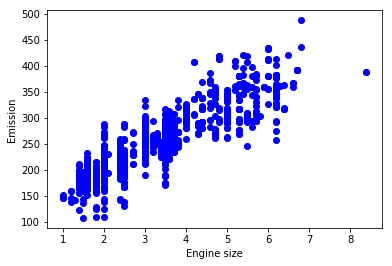

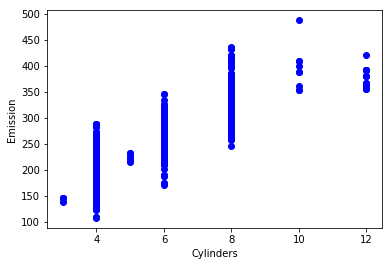

In [4]:
#Drawing scatterplots to look at whether the relationship between variables is linear
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


### Step 4 | Creating a Train & Test Dataset
- mutually exclusive sets
- 80% training, 20% testing
- the goal is to provide a more accurate evaluation of out-of-sample accuracy (which we need for real world problems)


In [7]:
#Creating a mask selecting random rows for the train/test split
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Linear Regression fits a linear model with coefficients  𝜃=(𝜃1,...,𝜃𝑛)  to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

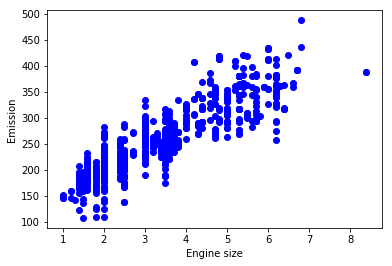

In [8]:
#Train data distribution scatterplot
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
#We can now use the sklearn package to model data through a linear model
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.57372147]]
Intercept:  [124.73227651]


Text(0, 0.5, 'Emission')

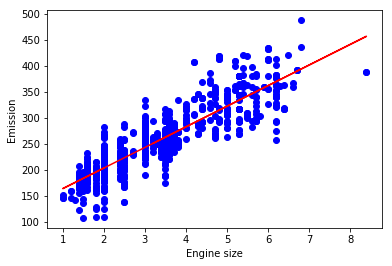

In [16]:
#Let's add a fit line
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Step 5 |  Model Evaluation
Model evaluation metrics
* Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.  


* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.   


* Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.   


* R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 20.77
Residual sum of squares (MSE): 764.33
R2-score: 0.74


## Multiple Linear Regression

In [18]:
### Let's extend the simple linear regression model and look at more than 1 IV

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.00247362  8.04283087  9.34415867]]


### Ordinary Least Squares (OLS)

_Coefficient and Intercept_ , are the parameters of the fit line. Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.  


__Ordinary Least Squares/OLS__ is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂  ) over all samples in the dataset.   


__OLS can find the best parameters using of the following methods:__

-Solving the model parameters analytically using closed-form equations  

-Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

In [20]:
#Regression Prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 381.08
Variance score: 0.88


__Explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

## Polynomial Regression

- the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x
- __PloynomialFeatures()__ function in Scikit-learn library generates a matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [21]:
#Polynomial Regression packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


In [31]:
#Defining the power/degree of the polynomial features!
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

#fit_transform takes our x values, and output a list of our data raised from power of 0 
#to power of 2 (since we set the degree of our polynomial to 2
# Polynomial regression is a special case of linear regression so we can use 
#the LinearRegression() function to solve it:

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         52.01446214 -1.65178118]]
Intercept:  [104.92020693]


Text(0, 0.5, 'Emission')

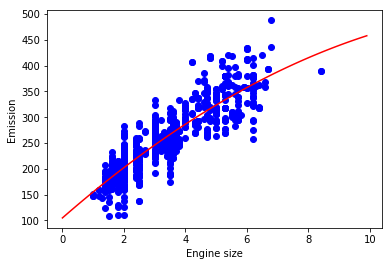

In [26]:
#Coefficient and Intercept , are the parameters of the fit curvy line. 
#Given that it is a typical multiple linear regression, with 3 parameters,
#and knowing that the parameters are the intercept and coefficients of hyperplane,
#sklearn has estimated them from our new set of feature sets. Here is the plot for it:

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [27]:
#Evaluation
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 20.75
Residual sum of squares (MSE): 768.10
R2-score: 0.74


Coefficients:  [[ 0.         29.34693373  4.54942912 -0.51080168]]
Intercept:  [129.14002034]
Mean absolute error: 20.72
Residual sum of squares (MSE): 768.12
R2-score: 0.74


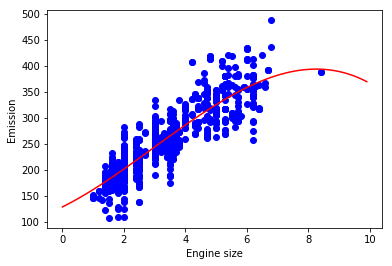

In [32]:
#We can change the polynomial features to 3 or more:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

#Scatterplot
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)

plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")


test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )


## Different types of regression based on the relationship between X and Y

### Linear

It models a linear relation between a dependent variable y and independent variable x. It had a simple equation, of degree 1, for example y =  2𝑥  + 3.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

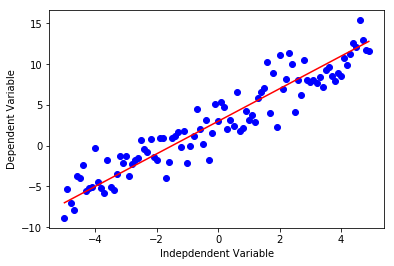

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Cubic

Non-linear relationships are usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$
    
Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$




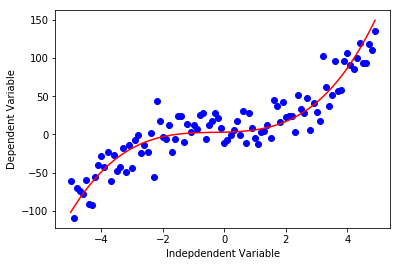

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Quadratic
𝑌=𝑋2



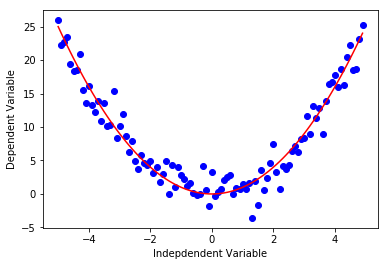

In [6]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Exponential

An expontential function with base c is defined by
𝑌=𝑎+𝑏𝑐𝑋
 
where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable.


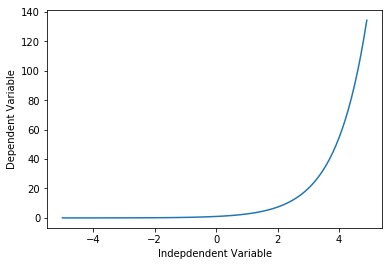

In [7]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of __log()__: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be polynomial representation of the $x$'s. In general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


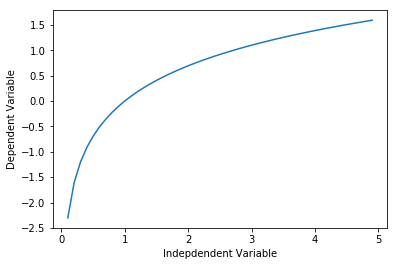

In [9]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoidal/Logistic

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

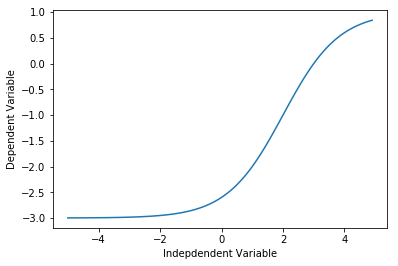

In [10]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Non-Linear Regression | Fitting a model of China's GDP datapoints per year

In [12]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2019-09-08 04:52:11 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


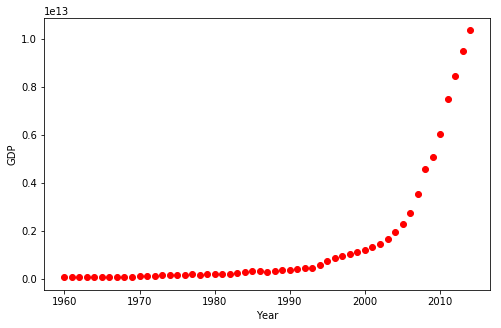

In [13]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Looks like a logistic or exponential function (slow growth, increasing in the middle and decreasing again at the end?), the formula for the logistic function being:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

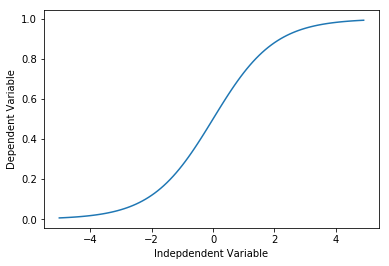

In [15]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Building a model

 beta_1 = 690.453017, beta_2 = 0.997207


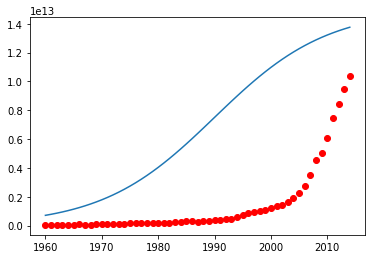

In [17]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

#Sample sigmoid line that might fit the data

beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#Then we can use curve_fit to use non-linear least squares for fitting the sigmoid function to the data

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

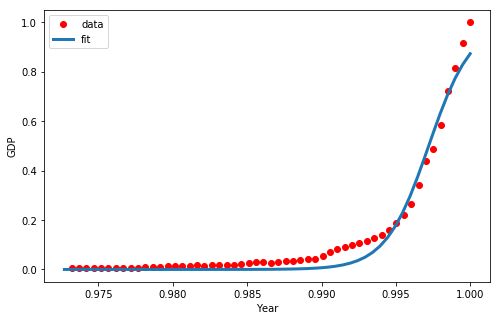

In [18]:
#Plotting the resulting model
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [19]:
#Calculating the accuracy of the model by using a Train/Test split

# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.96


# K-Nearest Neighbours (KNN) | Classification
<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

The K-Nearest Neighbors algorithm is a classification algorithm that takes several labeled points and uses them to learn how to label other points.
- i.e cases are classified based on their similarity to other cases.
- data points that are near each other are said to be neighbors
- similar cases with the same class labels are near each other. Thus, the distance between two cases is a measure of their dissimilarity. 

> In the example above our results change depending on whether we are looking at a k value of 3 or 6. 

### What value of K should we choose?

K is supposed to be specified by the User which prompts the question what is the right value to specify? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set.  
__Repeat this process, increasing the k, and see which k is the best for your model.__


* __Method__  
1.Pick a value for K  

2.Calculate the distance of the unknown case from all classes  

3.Select the K-observations in the training data that are the nearest to the unknown data point  

4.Predict the response of the unknown data point using the most popular response value from the K-nearest neighbours

* __Different ways to measure distance between 2 points in a vector space__
-__Euclidean distance__ the "ordinary" straight-line distance between two points in Euclidean space, i.e he length of the line segment connecting them    
-__Minkowski distance__ distance/ similarity measurement between two points in the normed vector space (N dimensional real space) and is a generalization of the Euclidean distance and the Manhattan distance  
-__Manhattan distance__ (a.k.a Taxicab distance, City block distance, Snake distance):  allude to the grid layout of most streets on the island of Manhattan, which causes the shortest path a car could take between two intersections in the borough to have length equal to the intersections' distance in taxicab geometry

_[Minkowski Distance explained by data scientist Bartosz Mikulski](https://www.mikulskibartosz.name/minkowski-distance-explained)_

* __Evaluation Metrics in Classification__
-comparing actual values in the test set (Y) with the predicted ones (Y hat)
-both the Jaccard Index and F1 can be used for multi-class classifiers

 1.__Jaccard Index (Jaccard Similarity Coefficient)__: size of the intersection divided by the size of the union of two labeled sets.If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0

>__We want a Jaccard Similarity score closer to 1.0 (high subset accuracy)__

2.__The Confusion matrix__ Shows the corrected and wrong predictions, in comparison with the actual labels
count of true negatives and false positives. Confusion matrix __rows show the Actual/True labels__ in the test set, __the columns show the Predicted labels__ by classifier

Abbreviations
True Positive/Negative = TP/TN  

False Positive/Negative = FP/FN

3.__F1-scores based on the matrix__
Precision:  (TP) / (TP + FP)  

Recall = TP / (TP + FN)  

F1 score (harmonic average of precision and recall) = 2 x (Prc x Rec)/ (Prc + Rec)  
>__The closer the F1 score it is to 1.0, the better the classifier__

4.__Log Loss__  
Logarithmic loss (also known as Log loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 

E.g: Predicting a probability of 0.13 when the actual label is 1, would be bad and would result in a high log loss

>__The classifier with lower log loss has better accuracy__


### KNN LAB

#### Preparing the dataset

In [2]:
#Loading the required libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
#Dataset with telecommunication customers data (segmented into 4 key customer groups)
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

df = pd.read_csv('teleCust1000t.csv')

--2019-09-08 23:05:44--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

100%[======================================>] 37,048      --.-K/s   in 0.002s  

2019-09-08 23:05:44 (20.9 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ff048df60>]],
      dtype=object)

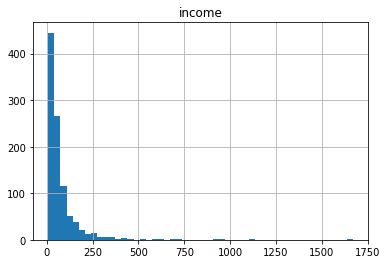

In [5]:
#Looking at the values of each class and drawing a historgram based on income

df['custcat'].value_counts()
df.hist(column='income', bins=50)

#### Feature Set

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
#To use scikit-learn we need to convert pandas df to a numpy array for both x and y
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

#### Data Normalization
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

#### Train Test Split 
- importing the Train/test tolls from scikit-learn to ensure better out-of-sample accuracy

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


#### Classification with KNN

* Choose a k value  
* Use the model to predict a test set  
* Evaluate the model accuracy with the __accuracy classification score__ function that computes subset accuracy. 

This function is  equal to __the jaccard similarity score__
function.  
Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#Training with k = 4 for starters
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

# Evaluate accuracy

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.55625
Test set Accuracy:  0.26


#### Calculating KNN accuracy with different Ks

In [14]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.295, 0.35 , 0.33 , 0.32 ])

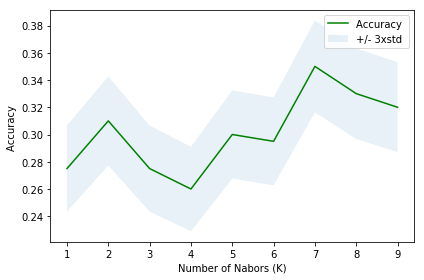

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [16]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.35 with k= 7


# Decision Trees

Decision trees are built by splitting the training set into distinct nodes, where one node contains all of or most of one category of the data. Decision trees are built by recursive partitioning to classify the data

Тhe decision to choose drug A or B will be influenced by the patient's situation:

- each internal node = test
- each branch = test result
- each leaf node = assigned classification

__Constructing a Decision Tree Learning Algorithm__
1. Choose an attribute from the dataset
2. Calculate the significance of the attribute in splitting of data
3. Split data based on the value of the best attribute|
4. Repeat and use the process to predict best choice for an unknown case


#### Entropy & Information Gain

__Entropy__ is the amount of information disorder/randomness in the data and it is calculated for each node. We are looking for decision trees with the smallest entropy in the nodes.  

completely homogenous samples have zero entropy and if samples are equally divided, the entropy = 1

__Information Gain__  The tree with the higher information gain after splitting is more efficient

Information gain = (Entropy before split) -(weighted entropy after split or portion of data x entropy)



In [1]:
#Loading Libraries

import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#Downloading the dataset
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

#Creating a dataframe
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

--2019-09-09 04:29:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

100%[======================================>] 6,027       --.-K/s   in 0s      

2019-09-09 04:29:25 (461 MB/s) - ‘drug200.csv’ saved [6027/6027]



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


#### Pre-processing

In [2]:
#Pre-processing: Removing the column with target name since it doesn't contain numeric values

X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

#Sklearn does not handle categorical variables, so we need to prep data first by converting
#the categorical variable into dummy/indicator variables

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

#Fill in the target variable
y = my_data["Drug"]
y[0:5]



0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

#### Setting up the Decision tree

In [6]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

#### Modelling + Fit

In [7]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Predictions


In [9]:
predTree = drugTree.predict(X_testset)

print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


#### Evaluation

__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

NameError: name 'y_testset' is not defined

#### Visualization

In [6]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: / ^C
failed

CondaError: KeyboardInterrupt

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.13       |             py_0          18 KB  conda-forge

The following NEW packages will be INSTALLED:

    python-graphviz: 0.13-py_0        conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.8.28-0      anaconda    --> 2019.9.11-hecc5488_0 conda-forge
    certifi:         2019.9.11-py36_0 anaconda    --> 2019.9.11-py36_0     conda-forge

The following packages will be DOWNGRADED:

    openssl:         1.1.1-h7b6447c_0 anaconda    --> 1.1.1c-h516909a_0    conda-forge


python-graphviz-0.13 | 18 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying

In [5]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

ModuleNotFoundError: No module named 'pydotplus'

In [4]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

NameError: name 'StringIO' is not defined

# Logistic Regression

While __Linear Regression__ is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point.  

__Logistic Regression__ is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression __fits a special s-shaped curve__ by taking the linear regression and transforming the numeric estimate into a probability with a __sigmoid function__ 

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">

__The objective?__ To find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

## Lab | Customer churn in the telecomm industry

In [14]:
#Packages
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt


In [16]:
#Dataset
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv 
    
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

--2019-09-10 22:35:33--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

100%[======================================>] 36,144      --.-K/s   in 0.002s  

2019-09-10 22:35:33 (18.6 MB/s) - ‘ChurnData.csv’ saved [36144/36144]



,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [17]:
#Preprocessing  1. Selection of some features 2. Changing the data type to int (requirement for skitlearn)
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [18]:
#Defining X and y
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

y = np.asarray(churn_df['churn'])
y [0:5]

#Normalizing
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### Train/Test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


## Modeling

* Logistic regression model with Scikit-learn:
- which allows us to use different numerical optimizers to find theta parameters
- supports __Regularizaion__:a technique used to __solve the overfitting problem__ in machine learning models. C parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

#Predict yhat with the test set
yhat = LR.predict(X_test)
yhat

#predict_proba returns estimates for all classes, ordered by the label of classes.
#So, the first column is the probability of class 1, P(Y=1|X),
#and second column is probability of class 0, P(Y=0|X):

yhat_prob = LR.predict_proba(X_test)
yhat_prob


array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

## Evaluation
### Jaccard index
I.e the size of the  intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a __sample strictly match with the true set of labels, then the subset accuracy is 1.0__; otherwise it is 0.0.

In [21]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.75

### Confusion Matrix

In the specific case of binary classifier, such as this example, we can interpret these numbers as __the count of true positives, false positives, true negatives, and false negatives.__

Based on the count of each section, we can calculate the __precision and recall__ of each label:

__Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

__Recall is true positive rate__. It is defined as: Recall = TP / (TP + FN)

__F1 score__: based on the precision and recall of that label, the F1 score is the harmonic average of the precision and recall, where an __F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0__. It is a good way to show that a classifer has a good value for both recall and precision.

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


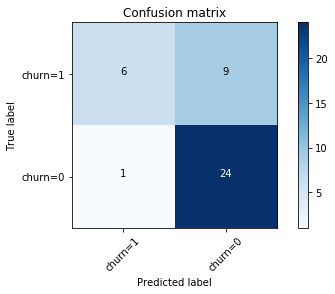

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [25]:
# we can tell the average accuracy for this classifier is the average of the F1-score for both labels,
#which is 0.72 in our case (f-score_weighted avg)
print (classification_report(y_test, yhat))



              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

   micro avg       0.75      0.75      0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



### Log Loss
Log loss( Logarithmic loss) __measures the performance of a classifier__ where the predicted output is a probability value between 0 and 1. 

The closer the value is to 0.0, the better the classifier


In [26]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

### Practice: Trying different Solver & Regularization values

>solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, optional (default=’liblinear’).


Algorithm to use in the optimization problem.
* For small datasets, __‘liblinear’__ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
* For multiclass problems, only __‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;__ ‘liblinear’ is limited to one-versus-rest schemes.
*‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle __L2 or no penalty__
*‘liblinear’ and ‘saga’ also __handle L1 penalty__
‘saga’ also supports ‘elasticnet’ penalty
‘liblinear’ does not handle no penalty

Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

In [34]:
LR1 = LogisticRegression(C=0.05, solver='sag').fit(X_train,y_train)
LR1

yhat = LR1.predict(X_test)
yhat

yhat_prob = LR1.predict_proba(X_test)
yhat_prob

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.585559910367681

## Support Vector Machine (SVM)

SVM works by __mapping data to a high-dimensional feature space__ so that data points can be categorized, even when the data are not otherwise linearly separable. 

A __separator__ between the categories is found, then the data is transformed in such a way that the separator could be __drawn as a hyperplane__. 

Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [36]:
#Loading packages
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [35]:
#loading file
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
    
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

--2019-09-10 23:40:40--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

100%[======================================>] 20,675      --.-K/s   in 0.002s  

2019-09-10 23:40:40 (9.36 MB/s) - ‘cell_samples.csv’ saved [20675/20675]



,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


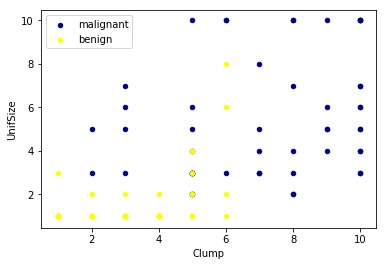

In [37]:
#Looking at the distribution of the classes based on Clump thickness and Uniformity of cell size
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [38]:
## Pre-processing: dropping non-numerical values
cell_df.dtypes

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

#We want the model to predict the value of Class (that is, benign (=2) or malignant (=4)). 
#As this field can have one of only two possible values, 
#we need to change its measurement level to reflect this.

cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

### Train/Test

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


### Modelling
#### SVM with Scikit-learn

The SVM algorithm offers a __choice of kernel functions for performing its processing__. 

Basically, __mapping data into a higher dimensional space is called kernelling__. 

The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function).

In [58]:
#Model fitting
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

#Predicting new values
yhat = clf.predict(X_test)
yhat [0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([2, 4, 2, 4, 2])

### Evaluation
#### Confusion Matrix, F1-score & Jaccard Index

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


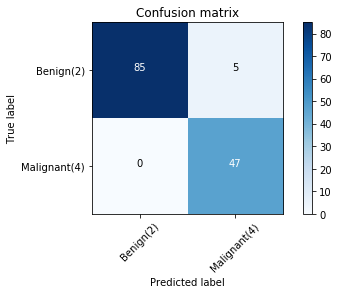

In [61]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [76]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9639038982104676

In [77]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9635036496350365

In [81]:
#### Rebuilding the model with a Linear Kernel
#Model fitting   

clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))



Avg F1-score: 0.9639
Jaccard score: 0.9635


In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


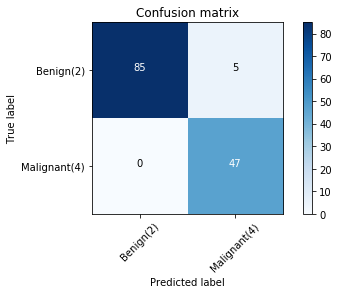

In [83]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

## Clustering

- unsupervised grouping of data, based on the similarity of customers to each other. 
- partitions items into mutually exclusive groups
- helpful for developing highly personalised options and experiences 

__Cluster__:a group of objects similar to other objects in the cluster and dissimilar to data points in other clusters

### Clustering vs Classification

* __Classification__: supervised learning where each training data instance belongs to a particular class (decision trees)
* __Clustering__: the data is unlabeled and the process is unsupervised (K-means)


### Applications
- Retail & Mark: buying patterns of customers; recommendations
- Banking: fraud detection in credit card use, loyal customer clusters
- Insurance: fraud detection in claims, insurance risk
- Publication/Media: auto-categorize news, tag news, recommend articles
- Medicine: characterise patient behaviour
- Biology: group genes with similar expression markers

### Broader Applications

* Exploratory Data Analysis
* Summary generation
* Outlier detection
* Finding Duplicates
* Step in pre-processing


### Clustering algorithms
1. Partition-based clustering, relatively efficient: L k-means, k-median, fuzzy c-means
2. Hierarchical (trees of clusters): Agglomerative, Divisive
3. Density-based (arbitrarily shaped clusters): DBSCAN, etc


## K-Means 

<img src="https://www.mathworks.com/help/examples/stats/win64/PartitionDataIntoTwoClustersExample_02.png">

- customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics
- K-means can group unsupervised data; type of partitioning clustering producing sphere-like clusters
- relatively efficient in Medium to Large size datasets

__Partitioning Clustering__: 
- divides data into non-overlapping subsets without cluster-internal structure
- items within the same cluster are very similar and in different clusters - very dissimilar
- representative points are data points called __centroids__

__Key issues__
- how can we find the similarity of samples in clustering?
- how do we measure how similar two customers are with regard to their demographics? 


> conventionally the distance of samples from each other is used to shape the clusters. __So we can say K-Means tries to minimize the intra-cluster distances__ and __maximize the inter-cluster distances__. 

__Objectives of K-means__
1. To form clusters in such a way that similar samples go into a cluster, and dissimilar samples fall into different clusters.
2. To minimize the “intra cluster” distances and maximize the “inter-cluster” distances.
3. To divide the data into non-overlapping clusters without any cluster-internal structure

__Dimensions of similarity/distance__
1. One-dimensional similarity/distance: using Euclidean distance formula
2. Two-dimensional similarity/distance: use the same formula but this time in a two-dimensional space. We can use the same distance matrix for multidimensional vectors.

> For example you may use Euclidean distance, Cosine similarity, Average distance, and so on. Indeed, the similarity measure highly controls how the clusters are formed, so it is recommended to understand the domain knowledge of your dataset and datatype of features and then choose the meaningful distance measurement.

__k-Means clustering__
1. Initialize k = value centroids randomly
2. Calculate the distances between data points from the centroids (depending on the purpose and the nature of teh data, different distance measures can be used)
3. Using a distance matrix to assign each point to the closest centroid: all items fall to a cluster based on their distance to centroids. The problem is the centroids were cosen at random, so we should shape clusters in such a way that the total distance of all members of a cluster from its centroid be minimized
4. Compute new centroids for each cluster. In other words the centroid of each of the three clusters becomes the new mean (And the distance between each point and the new centroid has to be measured again)
5. Repeat until there are no more changes

>  this algorithm is guaranteed to converge to a result but the result may be a local optimum i.e. not necessarily the best possible outcome. To solve this problem, it is common to run the whole process multiple times with different starting conditions. This means with randomized starting centroids, it may give a better outcome. As the algorithm is usually very fast, it wouldn't be any problem to __run it multiple times__.

### k-Means clustering algorithm recap
1. Randomly place k- centroids (1 per cluster)
2. Calcilate distances (point to centroid)
3. Assign each datapoint to its closest centroid (forming a cluster)
4. Recalculate centroid positions
5. Repeat until centroids no longer move

#### Evaluation of k-Means accuracy
- External: compare to the ground truth
- Internal approach: average the distance between data points

> Choosing K i s a frequent problem in data clustering: depends on shape and scale of the distribution. Brute force solution: run the algo through different values. However, increasing k will always decrease the error.
__elbow method__ looking at the downward trend to determine the elbow point where the rate of decrease sharply shifts.



# k-Means Lab

_Recap_

- K-Means us considered to be one of the simplest, yet most vastly used clustering models in data science applications
- it is especially useful for discovering insights from __unlabeled__ data
- it is useful for customer segmentation, ML, pattern recognition, data compresson

__Importing key libraries__


In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline


__Creating a randomly generated dataset with random.seed()__

- generating data
- making random clusters of points with make_blobs

Input

- n_samples: The total number of points equally divided among clusters.
Value will be: 5000
- centers: The number of centers to generate, or the fixed center locations.
Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
- cluster_std: The standard deviation of the clusters.
Value will be: 0.9

Output
- X: Array of shape [n_samples, n_features]. (Feature Matrix)
The generated samples.
- y: Array of shape [n_samples]. (Response Vector)
The integer labels for cluster membership of each sample.

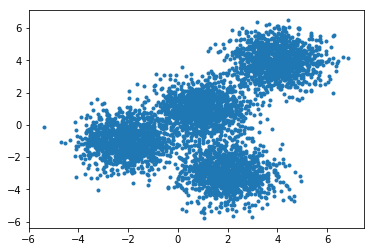

In [2]:
np.random.seed(0)

X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

plt.scatter(X[:, 0], X[:, 1], marker='.')

# Setting up K-Means
Now that we have our random data, let's set up our K-Means Clustering.
The KMeans class has many parameters that can be used, but we will be using these three:

* __init__: Initialization method of the centroids.
Value will be: "k-means++"
k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

* __n_clusters__: The number of clusters to form as well as the number of centroids to generate.
Value will be: 4 (since we have 4 centers)

* __n_init__: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
Value will be: 12
Initialize KMeans with these parameters, where the output parameter is called k_means.

In [3]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

#Fitting the model with the feature matrix we created (X)
k_means.fit(X)

#Putting labels for each point in the model with the .labels_ attribute
k_means_labels = k_means.labels_
k_means_labels

#Getting coordinates of the cluster centers with .cluster_centers_
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

## Visual Plot

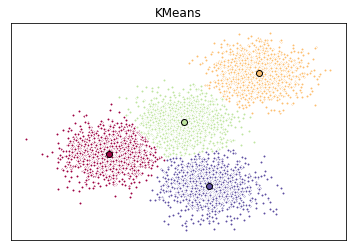

In [4]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()



## Customer Segmentation

To partition a customer base into groups of individuals with similar characteristics, we need to get a dataset with !wget, pre-process it, create a model and draw some insights

In [5]:
# Importaing a Databse from the IBM Object Storage
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

#Get the Customer Segmentation csv file
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

--2019-09-28 00:05:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

100%[======================================>] 34,276      --.-K/s   in 0.002s  

2019-09-28 00:06:00 (15.7 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing
The Address column in the dataset is a __categorical variable__. 

1. The __k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables__. So, lets drop this feature and run clustering.

2. We also need to __normalize the dataset__. Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset

In [6]:
df = cust_df.drop('Address', axis=1)
df.head()

from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Modelling

Instead of guessing what each customer group would look like based on different features, we can use k-Means clustering and look at the assigned labels to make the process easier.

_Note that k-Means  makes a partition into mutually exclusive groups_

[1 2 1 1 0 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 2 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1
 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 2 1 1 2 0 1 2 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 2 2 1 2 1 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 1 2 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 1 

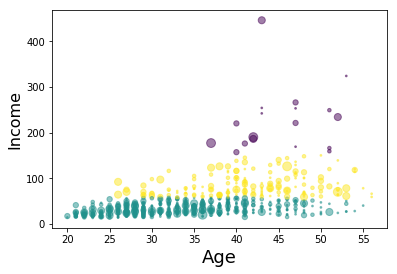

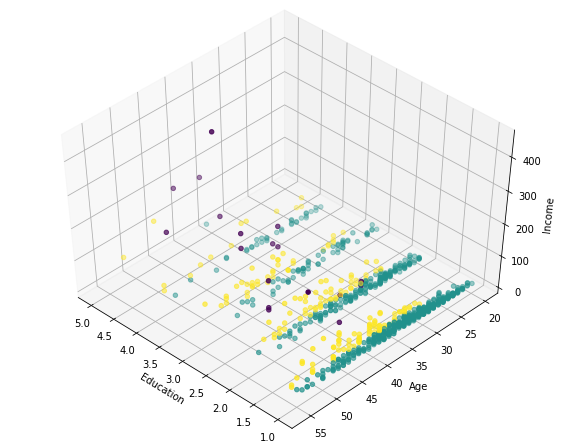

In [7]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

# Now let's assign labels to each row in the df
df["Clus_km"] = labels
df.head(5)

# Let's check the centroid values (averaging the features in each cluster)
df.groupby('Clus_km').mean()

# So what kind of distribution is it?
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


## Hierarchical Clustering

<img src="https://www.researchgate.net/profile/Brian_Davis51/publication/263165803/figure/fig1/AS:460859987238917@1486888991831/Cladogram-from-vonHoldt-et-al-2010-depicting-the-structure-of-domestic-dog-breeds-as.png">

[Source: Von Holdt et al.(2014)](https://www.researchgate.net/publication/263165803_Domestic_Dogs_and_Cancer_Research_A_Breed-Based_Genomics_Approach)

- Building a hierarchy of clusters where each node is a cluster consisting of the clusters of its daughter nodes

### Types
1. __Divisive (dividing the cluster)__: top-down, starting with all observations in a large cluster and breaking them down into smaller pieces
2. __Agglomerative__(agglomerate = amass, collect things): bottom-up, each observation starts in its own cluster and pairs are merged together as they move up the hierarchy; more popular among data scientists

>  Hierarchical clustering is typically visualized as a dendrogram as shown on this slide. __Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged__ where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, a __dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering__. Essentially, hierarchical clustering does not require a prespecified number of clusters. However, in some applications, we want a partition of disjoint clusters just as in flat clustering. In those cases, the hierarchy needs to be cut at some point.


### Agglomerative algorithm
1. Create n clusters (1 per data point)
2. Compute the Proximity Matrix
3. Repeat:
- merging the 2 closest clusters
- updating the proximity matrix
4. End when only a single cluster remains

## More on Hierarchical Clustering 
Types (repeated until all clusters are merged and the tree becomes completed)
Divisive (dividing the cluster): top-down, starting with all observations in a large cluster and breaking them down into smaller pieces
Agglomerative(agglomerate = amass, collect things): bottom-up, each observation starts in its own cluster and pairs are merged together as they move up the hierarchy; more popular among data scientists


__Agglomerative algorithms (a bottom up approach)__
1. Create n clusters (1 per datapoint)
2. Compute the proximity matrix ( n x n matrix)
3. Repeat
- merge the 2 closest clusters
- update the proximity matrix
4. Keep iterating until a single cluster remains

> Distances between clusters plus merging nearest ones
>How do we measure intercluster distance to determine which are the nearest?

__Similarity/Distance__
Different distance measurements (e.g Euclidiean distance), n by n dissimilarity matrix,
but we still merge the clusters using agglomerative clustering

- Single- linkage clustering
min distance between clusters
- Complete linkage clustering
max distance
- Average linkage clustering
mean distance (from one point to all others)
- Centroid linkage clustering
distance between centroids


__Advantages for hierarchical clustering__
- Doesn’t require specifying the number of clusters
- Easy to implement
- Very useful dendrogram for data understanding

__Disadvantages__
- Cannot undo previous steps in the algo
- Very long computation time (unlike effcient k-means)
- Difficult to determine the correct number of clusters by the dendrogram

__How is hierarchical clustering (HC) different from k-Means (K)?__
1. HC is Slower than k for large datasets (K is more efficient)
2. HC doesn't require specifying the number of clusters (K does)
3. K gives only one partitioninng of the data (based on the predefined number of clusters),HC provides multiple
4. K uses random initialization of centroids and thus returns potentially returns different clusters, HC returns the same clusters every time

## Lab | Agglomerative Hierarchical Clustering 

* Focusing on Agglomerative Hierarchical Clustering (a bottom-up approach)
* Using complete linkage (using max distance) as linkage criteria


Random dataset generation with make_blobs

-  <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
-  <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
- <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>

_Save the result to <b>X1</b> and <b>y1</b>._

The <b> Agglomerative Clustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
    
_Save the result to a variable called <b> agglom </b>_

In [5]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 

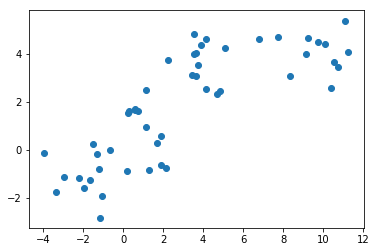

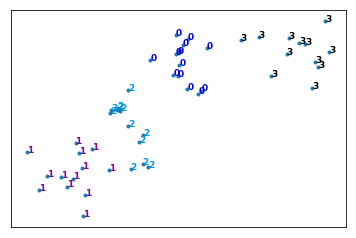

In [6]:
#Generating random data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

#Scatterplot
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

#Agglomerative clustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

#Fitting the model with X2 and y2 from the dataset
agglom.fit(X1,y1)

#Plot the results
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()


<h3 id="dendrogram">Dendrogram Associated for the Agglomerative Hierarchical Clustering</h3>

A <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>. <br>
Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X2 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>

* The distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)

* Using __linkage__ class from hierarchy, we can pass the parameters: distance matrix and complete linkage and save them as a variable Z


__Hierarchical clustering is typically visualized as a dendrogram__.
- each merge is represented by a horizontal line. 
- the __ y-coordinate__ of the horizontal line is the __similarity of the two clusters that were merged__, where cities are viewed as singleton clusters. 
- moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering (the dendrogram is assigned to the variable called <b>dendro</b>) 

[[0.         0.36135477 0.47680474 ... 0.39000723 0.01510481 0.08501996]
 [0.36135477 0.         0.21075712 ... 0.66440906 0.36224273 0.31516305]
 [0.47680474 0.21075712 0.         ... 0.83521848 0.48378003 0.46326989]
 ...
 [0.39000723 0.66440906 0.83521848 ... 0.         0.37729771 0.37416912]
 [0.01510481 0.36224273 0.48378003 ... 0.37729771 0.         0.07427372]
 [0.08501996 0.31516305 0.46326989 ... 0.37416912 0.07427372 0.        ]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


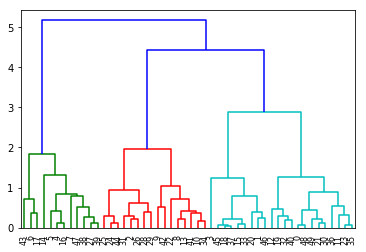

In [7]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

#Setting linkage parameters
Z = hierarchy.linkage(dist_matrix, 'complete')

# Dendrogram
dendro = hierarchy.dendrogram(Z)

### Practice | Clustering Vehicles dataset
- grouping existing vehicles based on how similar they are to a new prototype (i.e finding similar groups which the new model would be most likely to compete against)

#### Data preparation & Normalization

In [8]:
# Downloading data
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

# Reading csv
filename = 'cars_clus.csv'

# Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

# Data cleaning (dropping rows with null values)
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

# Selecting a feature set
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

#Using MinMaxScaler to transform features by scaling them to a given range (0,1 by default)
#This scales and translates each feature individually
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

--2019-09-28 04:57:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

100%[======================================>] 17,774      --.-K/s   in 0.001s  

2019-09-28 04:57:03 (21.4 MB/s) - ‘cars_clus.csv’ saved [17774/17774]

Shape of dataset:  (159, 16)
Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

#### Clustering with Scipy
- First calculating a distance matrix
- In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
    - single
    - complete
    - average
    - weighted
    - centroid

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


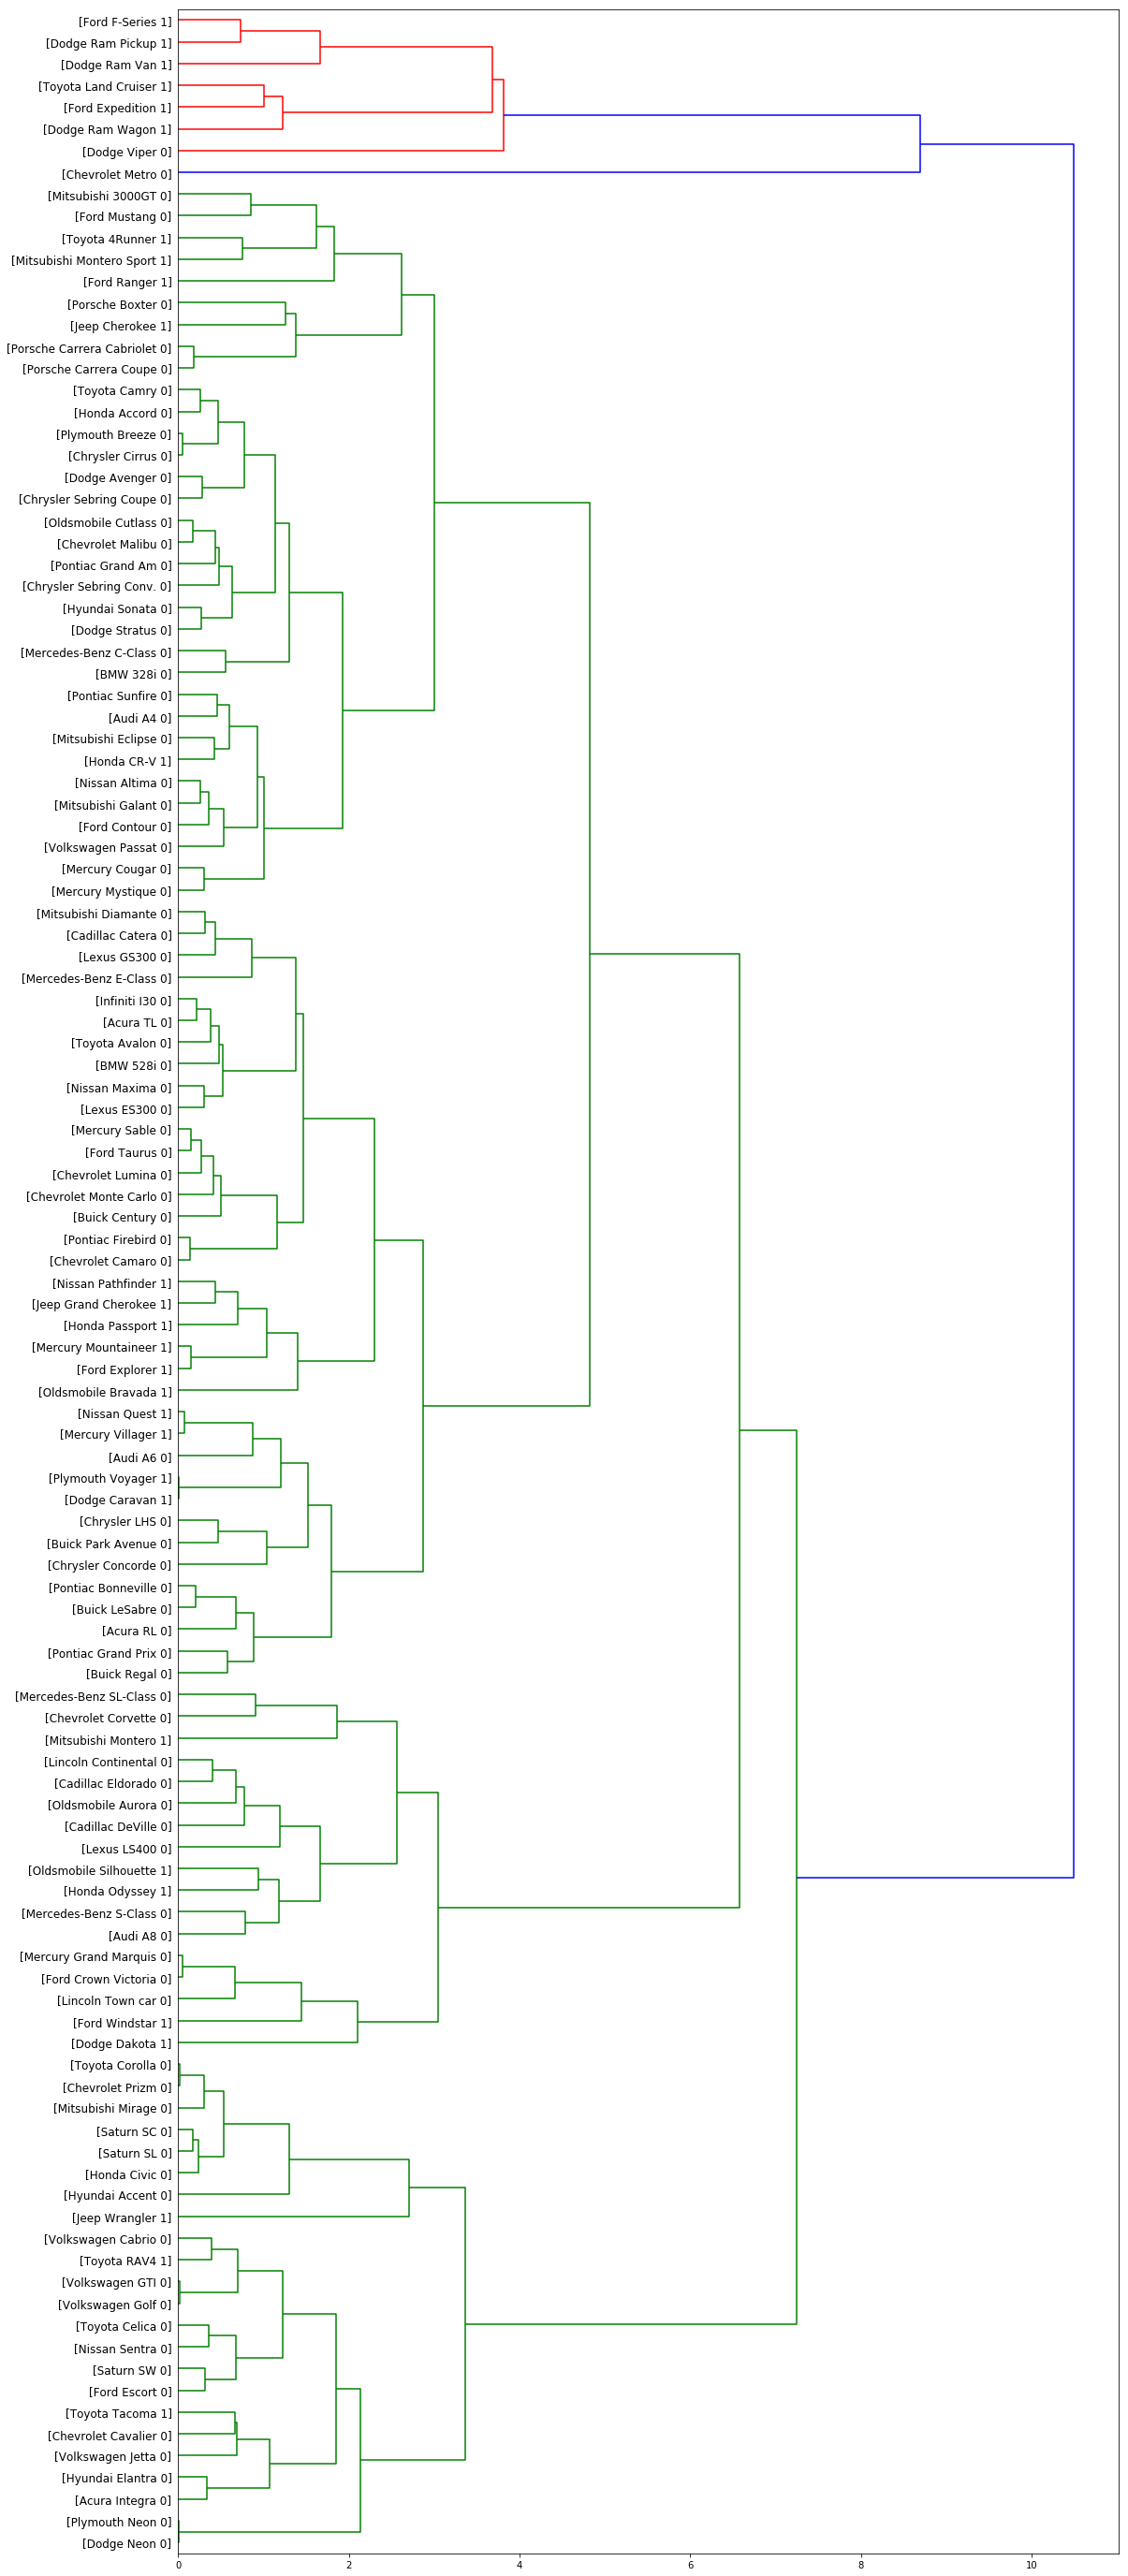

In [9]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
        
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

#Hierarchical clustering does not require a pre-specified number of clusters.
#However, in some applications we want a partition of disjoint clusters just as in flat clustering. 
#So we can use a cutting line

from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

# OR we can determine the number of clusters directly
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

# Plotting the dendrogram
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

#### Clustering with scikit-learn
It is also possible to use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. 

The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

- __Ward__ minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- __Maximum or complete linkage__ minimizes the maximum distance between observations of pairs of clusters.
- __Average linkage__ minimizes the average of the distances between all observations of pairs of clusters.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

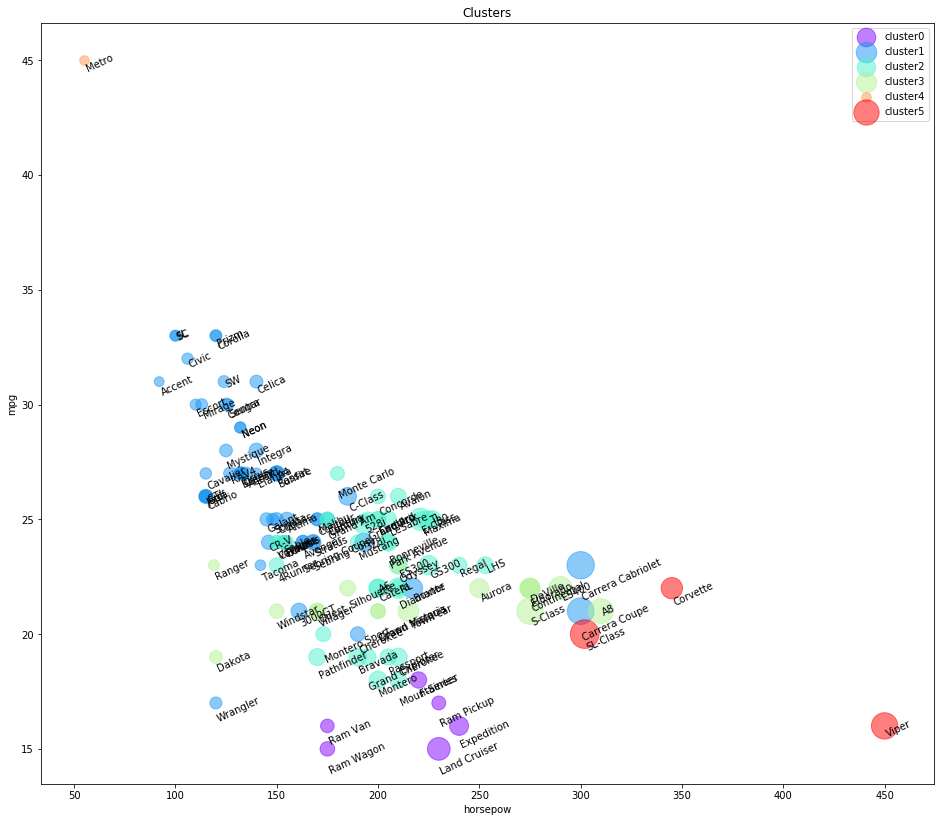

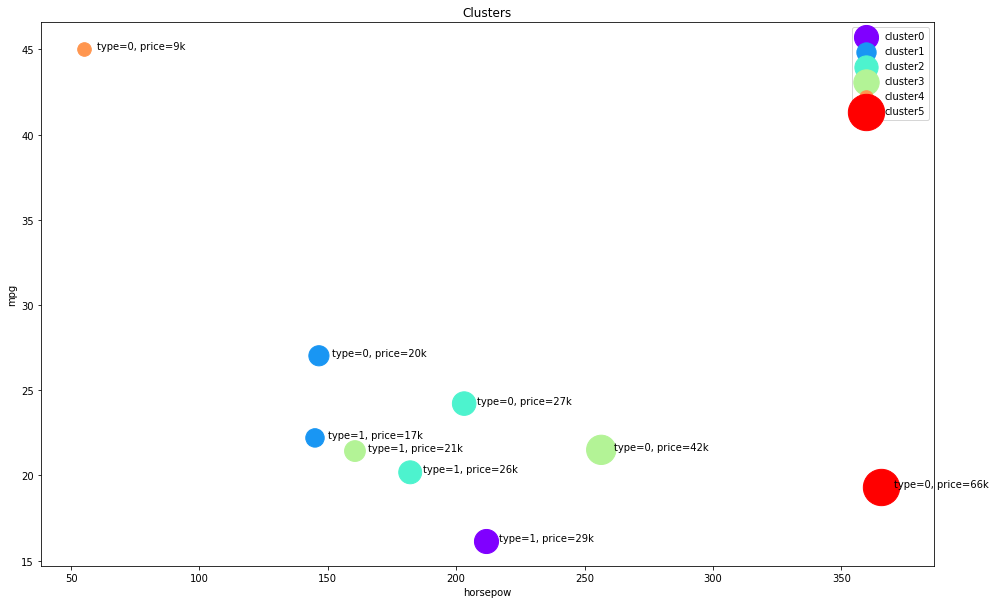

In [10]:
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

# Distance Matrix

dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

# Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

# Adding a new field with labels
pdf['cluster_'] = agglom.labels_
pdf.head()

import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

# We can use the two main types truck and care to distinguish classes and summarize the cluster
pdf.groupby(['cluster_','type'])['cluster_'].count()

# We then look at each cluster's characteristics
agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

#Plotting the results

plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


## Density-based Clustering | DBSCAN

Most of the traditional clustering techniques (k-means, hierarchical and fuzzy clustering,etc) are used to group data without supervision. However, they do not perform as well in tasks with arbitrary shape clusters, or clusters within cluster.

Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

__Useful libraries__
  <li> <b>numpy as np</b> </li>
    <li> <b>DBSCAN</b> from <b>sklearn.cluster</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
    <li> <b>StandardScaler</b> from <b>sklearn.preprocessing</b> </li>
    <li> <b>matplotlib.pyplot as plt</b> </li>
</ul> <br>

_Remember <b> %matplotlib inline </b> to display plots_


In [21]:
# Notice: For visualization of map, you need basemap package.
# if you dont have basemap install on your machine, you can use the following line to install it
!conda install -c conda-forge  basemap==1.1.0  matplotlib==2.2.2  -y
# Notice: you maight have to refresh your page and re-run the notebook after installation

import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - basemap==1.1.0

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/linux-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/linux-64
  - https://repo.anaconda.com/pkgs/pro/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




### Data generation
The function below will generate the data points and requires these inputs:
<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: The standard deviation between the clusters. The larger the number, the further the spacing. </li>
    <ul> <li> Example: 0.5 </li> </ul>
</ul>

In [17]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

### Modeling
DBSCAN is one of the most common clustering algorithms and it works based on density of object.i.e if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points  
* __Epsilon__ determine a specified radius that if includes enough number of points within, we call  it dense area  
* __minimumSamples__ determine the minimum number of data points we want in a neighborhood to define a cluster.



In [18]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels


array([0, 1, 1, ..., 2, 0, 1])

### Distinguishing outliers & Visualizing Results
Lets Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.

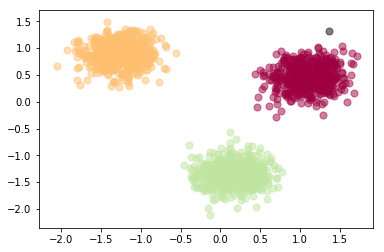

In [19]:
# First, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

### Practice| Weather Station Clustering

In [20]:
# Downloading the dataset
!wget -O weather-stations20140101-20141231.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv

#Loading as csv
import csv
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

# Cleaning (removing rows with null value in the Tm field)
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

#Visualization with the basemap package toolkit in matplotlib (2D maps in Python)

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()




--2019-09-28 05:19:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘weather-stations20140101-20141231.csv’

100%[======================================>] 129,821     --.-K/s   in 0.005s  

2019-09-28 05:19:50 (24.7 MB/s) - ‘weather-stations20140101-20141231.csv’ saved [129821/129821]



ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [22]:
#Clustering based onlocation (latitude and longitude)
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

set(labels)

#Visualization of clusters based on location
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

        

KeyError: "None of [Index(['xm', 'ym'], dtype='object')] are in the [columns]"

In [ ]:
# Clustering based on location, mean,max andmin temp
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

# Plotting
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))